# Predicting heart disease using Machine Learning
We look into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.


We're going to take the following approach:

1. Problem definition
2. Data
3. Features
4. Modelling
5. Comparison
5. Experimentation


## 1. Problem Definition
Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
Data is taken from Cleavland data from the UCI Machine Learning repository.

https://archive.ics.uci.edu/ml/datasets/heart+Disease

## 3. Features
Information about the acquired data

**Data Dictionary**
* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
    0. Typical angina: chest pain related decrease blood supply to the heart
    1. Atypical angina: chest pain not related to heart
    2. Non-anginal pain: typically esophageal spasms (non heart related)
    3. Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
    0. Nothing to note
    1. ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    2. Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
    0. Upsloping: better heart rate with excercise (uncommon)
    1. Flatsloping: minimal change (typical healthy heart)
    2. Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
* thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Imports
Pandas, Matplotlib and NumPy for data analysis and manipulation.

Scikit-learn models and evaluation tools

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay

## Load Data

In [157]:
df = pd.read_csv("heart-disease.csv")
df.shape


(303, 14)

## Data Exploration (EDA)

In [158]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [159]:
df.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [160]:
df["target"].value_counts()


1    165
0    138
Name: target, dtype: int64

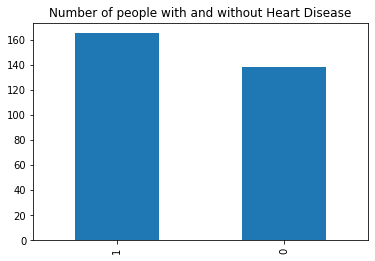

In [161]:
df["target"].value_counts().plot(kind="bar")
plt.title("Number of people with and without Heart Disease");


In [162]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [163]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [164]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Age distribution in data

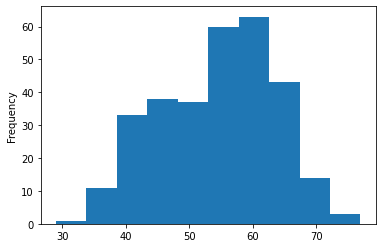

In [165]:
df.age.plot.hist();


### Age vs Max Heart rate for Heart disease
Max heart rate given in "thalach"

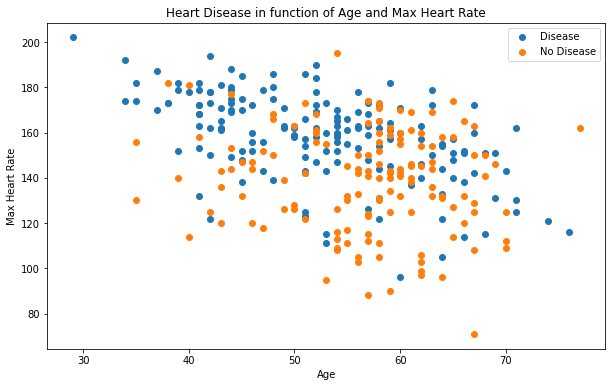

In [166]:
plt.figure(figsize=(10, 6))

# positive examples
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1])

# negative examples
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0])

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);


### Heart Disease frequency on the basis of sex
According to Dataset

0. Female
1. Male

In [167]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [168]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Text(0.5, 1.0, 'Heart Disease Frequency')

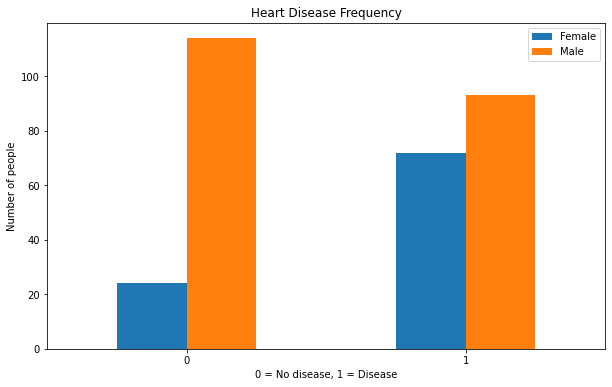

In [169]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6))
plt.xlabel("0 = No disease, 1 = Disease")
plt.xticks(rotation=0)
plt.ylabel("Number of people")
plt.legend(["Female", "Male"])
plt.title("Heart Disease Frequency")


### Heart Disease frequency and relation with chest pain
Given in "cp" of data.

0. Typical angina: chest pain related decrease blood supply to the heart
1. Atypical angina: chest pain not related to heart
2. Non-anginal pain: typically esophageal spasms (non heart related)
3. Asymptomatic: chest pain not showing signs of disease

In [170]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


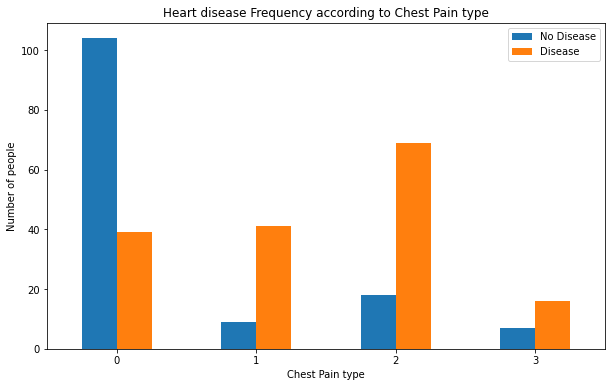

In [171]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10, 6))
plt.title("Heart disease Frequency according to Chest Pain type")
plt.xlabel("Chest Pain type")
plt.ylabel("Number of people")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);


### Correlation Matrix

A higher positive value means a potential positive correlation and a higher negative value means a potential negative correlation. 

In [172]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


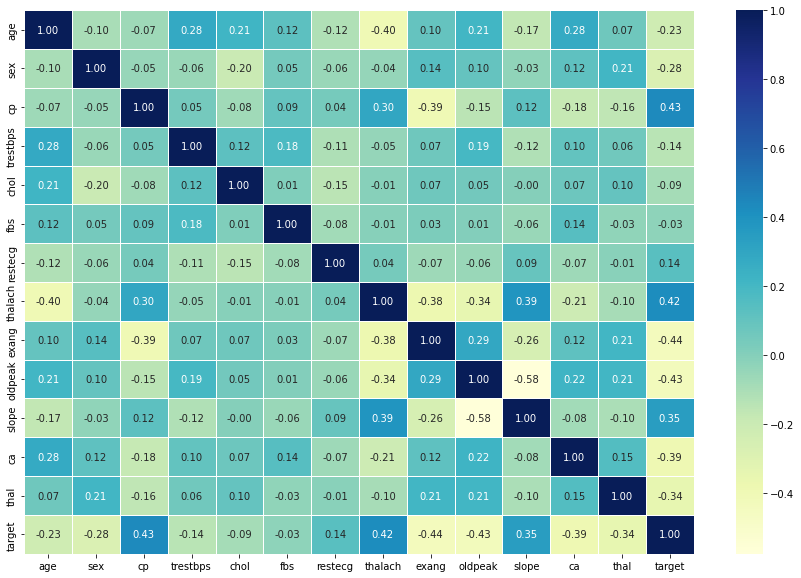

In [173]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")


As CP goes up, target goes up i.e. as value of CP increases from 0 to 3 the number of diseased people increases. This is a positive correlation.

Another positive correlation is between target value and thalach (Max Heart rate)

## 4. Modelling
Getting our dataset ready and using ML models on them

In [174]:
df = df.drop_duplicates()

In [175]:
X = df.drop("target", axis=1)
Y = df["target"]

Splitting into train and test sets

In [176]:
np.random.seed(55)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [177]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2
109,50,0,0,110,254,0,0,159,0,0.0,2,0,2
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2


In [178]:
Y_train

230    0
38     1
109    1
185    0
297    0
      ..
161    1
37     1
29     1
296    0
154    1
Name: target, Length: 241, dtype: int64

### Models
Three different models (from sklearn machine learning map) - 
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [179]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    np.random.seed(55)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, Y_train)
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores



### ROC curves for all three models

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


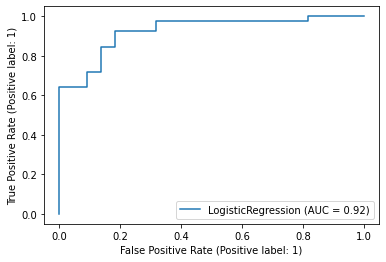

In [180]:
models["Logistic Regression"].fit(X_train, Y_train)
RocCurveDisplay.from_estimator(models["Logistic Regression"], X_test, Y_test);

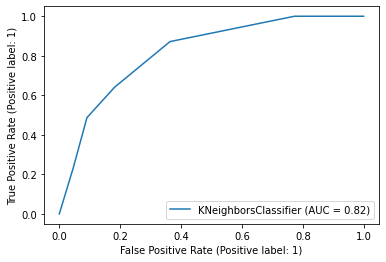

In [181]:
models["KNN"].fit(X_train, Y_train)
RocCurveDisplay.from_estimator(models["KNN"], X_test, Y_test);

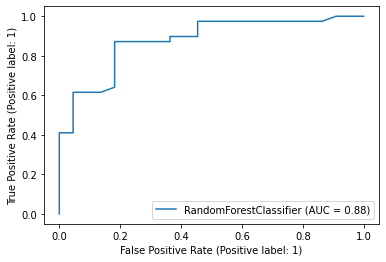

In [182]:
models["Random Forest"].fit(X_train, Y_train)
RocCurveDisplay.from_estimator(models["Random Forest"], X_test, Y_test);

## 5. Comparison
All models compared on their accuracies

In [183]:
model_scores = fit_and_score(models, X_train, X_test, Y_train, Y_test)
model_scores

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.819672131147541}

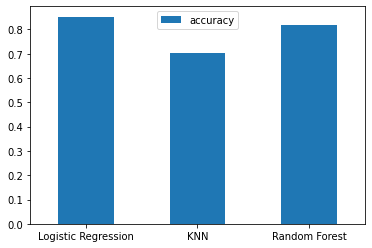

In [184]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();
plt.xticks(rotation=0);

### Tuning Models
* Hyperparameter tuning
* Feature imprtance
* Confusion matrix
* Cross validation
* Precision
* recall
* F1 score
* Classification report
* ROC curve
* Area under the curve

### KNN

In [185]:
train_scores = []
test_scores = []

# Training for different numbers of neighbors
neighbors = range(1, 21)
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, Y_train)
    train_scores.append(knn.score(X_train, Y_train))
    test_scores.append(knn.score(X_test, Y_test))


In [186]:
test_scores

[0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.6229508196721312,
 0.7049180327868853,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836,
 0.7213114754098361,
 0.6885245901639344,
 0.7377049180327869,
 0.6721311475409836,
 0.7213114754098361,
 0.7213114754098361,
 0.7377049180327869,
 0.6721311475409836,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7213114754098361]

Maximum score of KNN = 73.77%


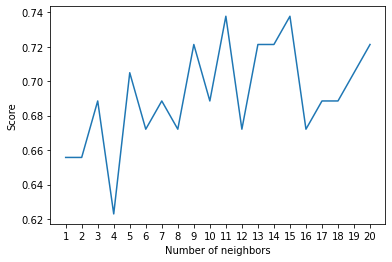

In [187]:
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Score")
print(f"Maximum score of KNN = {max(test_scores)*100:.2f}%")


### Hyperparameter tuning with RandomizedSearchCV
1. Logistic Regression
2. Random Forest

In [188]:
log_reg_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
}


In [189]:
np.random.seed(55)
rs_log_reg = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=log_reg_grid,
    cv=5,
    n_iter=20,
    verbose=True,
)
rs_log_reg.fit(X_train, Y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [190]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 29.763514416313132}

Best score for Logistic Regression -

In [191]:
rs_log_reg.score(X_test, Y_test)

0.8688524590163934

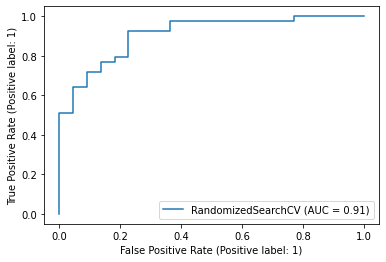

In [192]:
RocCurveDisplay.from_estimator(rs_log_reg, X_test, Y_test);

In [193]:
np.random.seed(55)
rs_rf = RandomizedSearchCV(
    RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True
)
rs_rf.fit(X_train, Y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [194]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': 5}

Best score for Random Forest -

In [195]:
rs_rf.score(X_test, Y_test)

0.819672131147541

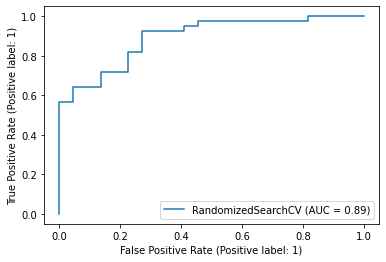

In [196]:
RocCurveDisplay.from_estimator(rs_rf, X_test, Y_test);

### Hyperparameter Tuning using GridSearchCV

In [197]:
log_reg_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}
gs_log_reg = GridSearchCV(
    LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True
)
gs_log_reg.fit(X_train.values, Y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [198]:
gs_log_reg.best_params_

{'C': 29.763514416313132, 'solver': 'liblinear'}

In [199]:
gs_log_reg.score(X_test.values, Y_test)

0.8688524590163934

## Evaluation
of the best performing model

In [200]:
gs_log_reg.score(X_test.values, Y_test)

0.8688524590163934

In [201]:
gs_log_reg.score(X_train.values, Y_train)

0.8547717842323651

In [202]:
y_preds = gs_log_reg.predict(X_test.values)

### ROC curve

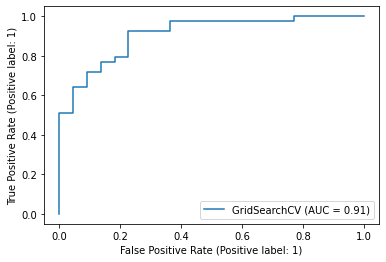

In [203]:
RocCurveDisplay.from_estimator(gs_log_reg, X_test.values, Y_test);

### Confusion Matrix

Text(6.0, 0.5, 'Predicted label')

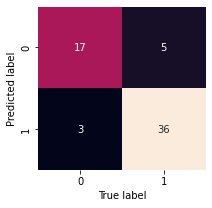

In [204]:
fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(confusion_matrix(Y_test, y_preds), annot=True, cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")


### Classification Report

In [205]:
print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        22
           1       0.88      0.92      0.90        39

    accuracy                           0.87        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.87      0.87      0.87        61



## Testing
We test user given input based on our Best performing model (GridSearchCV + Logistic Regression).

In [206]:
input_data = (62,1,3,145,233,1,0,150,0,2.3,0,0,1)
input_data = np.asarray(input_data)
input_data = input_data.reshape(1, -1)
prediction = gs_log_reg.predict(input_data)

In [207]:
prediction

array([1], dtype=int64)